In [1]:
from FinMind.data import DataLoader
import numpy as np
import talib
api = DataLoader()
df = api.taiwan_stock_daily(
    stock_id="TAIEX",
    start_date='2012-12-01',
    end_date='2018-12-02'
)

//anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
from talib.abstract import *

In [3]:
df = df[["date","open","max","min","close","Trading_Volume"]]

In [4]:
close_array = np.array(df['close'])
label = []
for i in range(len(close_array)):
    tmp_value = close_array[i]
    label_1 = tmp_value * 1.04
    label_2 = tmp_value * 0.98
    if(i >= (len(close_array)-20)):
        epoch_j = len(close_array) - i
    else:
        epoch_j = 21
    for j in range(epoch_j):
        if(close_array[i+j] >= label_1):
            label.append(int(1))
            break
        elif(close_array[i+j] <= label_2):
            label.append(int(2))
            break
    if(len(label) != (i+1)):
        if(epoch_j != 21):
            label.append(np.nan)
        else:
            label.append(int(0))
df['label'] = label

In [5]:
output = MA(df['close'], timeperiod=5)
BMA_5 = []
for i in range(len(df['close'])):
    BMA_5.append((df['close'][i] - output[i])/output[i])
df['5daysBMA'] = BMA_5

In [6]:
output = MA(df['close'], timeperiod=10)
BMA_10 = []
for i in range(len(df['close'])):
    BMA_10.append((df['close'][i] - output[i])/output[i])
df['10daysBMA'] = BMA_10

In [7]:
output = MA(df['close'], timeperiod=20)
BMA_20 = []
for i in range(len(df['close'])):
    BMA_20.append((df['close'][i] - output[i])/output[i])
df['20daysBMA'] = BMA_20

In [8]:
output = MA(df['close'], timeperiod=60)
BMA_60 = []
for i in range(len(df['close'])):
    BMA_60.append((df['close'][i] - output[i])/output[i])
df['60daysBMA'] = BMA_60

In [9]:
df['RSI'] = RSI(df['close'], period=14)

In [10]:
df['MACD'],df['MACDsignal'],df['MACDhist'] = MACD(df['close'])

In [11]:
df.to_csv("dataset.csv",index=False)

In [12]:
import pandas as pd
df = pd.read_csv("dataset.csv")

In [13]:
df = df.dropna()

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=13,random_state=0)
pca.fit(df.drop(columns=['date','label']))

PCA(copy=True, iterated_power='auto', n_components=13, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

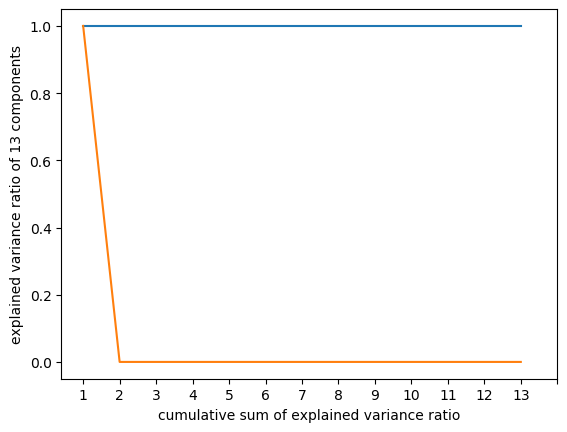

In [15]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_)
tmp = []
for i in range(13):
    tmp.append(str(i+1))
plt.xticks(np.arange(14), tmp)
plt.xlabel('cumulative sum of explained variance ratio')
plt.ylabel('explained variance ratio of 13 components')
plt.show()

In [16]:
pca = PCA(n_components=2,random_state=0)
pca.fit(df.drop(columns=['date','label']))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
X = pca.transform(df.drop(columns=['date','label']))
y = np.array(df['label'])

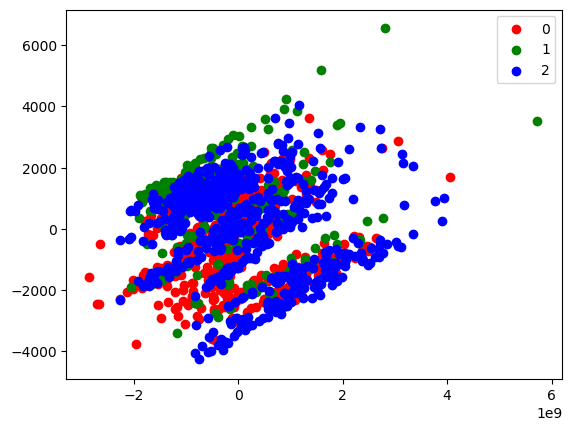

In [18]:
import matplotlib.pyplot as plt
x1 = []
x2 = []
x3 = []
for i in range(len(X)):
    if(y[i] == 0):
        x1.append([X[i][0], X[i][1]])
    elif(y[i] == 1):
        x2.append([X[i][0], X[i][1]])
    else:
        x3.append([X[i][0], X[i][1]])
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
plt.scatter(x1[:,0], x1[:,1],color='red',label='0')
plt.scatter(x2[:,0], x2[:,1],color='green',label='1')
plt.scatter(x3[:,0], x3[:,1],color='blue',label='2')
plt.legend()
plt.show()